# 第13次实验实验报告
计算机系 计15 2021010803 郭高旭

## 实验目的
- 了解回归分析的基本原理,掌握pyhton实现的方法
- 练习用回归分析解决实际问题

## 第5题：

### 问题分析与算法设计

### 问题分析

为了研究犯罪率与社会经济因素之间的关系，社会学家对20个城市进行了调查，记录了各城市的犯罪率和一些关键的社会经济指标。研究的主要目的是了解收入低、失业率和人口规模如何影响犯罪率。

#### 数据收集

在对20个城市的调查中，研究人员记录了以下变量：

1. **犯罪率**（Crime Rate）：每10万人中犯罪的人数，作为因变量。
2. **低收入家庭百分比**（Low Income Percentage）：年收入低于5000美元的家庭所占的百分比，记为X1。
3. **失业率**（Unemployment Rate）：城市的失业率，记为X2。
4. **人口规模**（Population Size）：城市的总人口，以千人为单位，记为X3。

#### 研究目的

本研究旨在回答以下几个问题：

1. **低收入家庭对犯罪率的影响**：年收入低于5000美元的家庭比例是否显著影响城市的犯罪率？
2. **失业率对犯罪率的影响**：失业率的变化是否显著影响城市的犯罪率？
3. **人口规模对犯罪率的影响**：人口规模是否显著影响城市的犯罪率？
4. **综合影响**：低收入家庭比例、失业率和人口规模之间是否存在交互作用，对犯罪率产生综合影响？

#### 数据分析方法

为了回答上述问题，研究人员将采用多元回归分析方法，建立一个回归模型，分析各自变量与因变量之间的关系。具体步骤如下：

1. **数据预处理**：对数据进行整理和标准化处理，确保数据的准确性和一致性。
2. **特征选择**：选择适当的自变量（低收入家庭比例、失业率、人口规模）和因变量（犯罪率）。
3. **模型建立**：采用多元回归模型，分析各自变量与因变量之间的关系。
4. **模型评估**：通过残差分析、显著性检验等方法评估模型的拟合效果和预测能力。
5. **结果解释**：根据模型结果，解释低收入家庭比例、失业率和人口规模对犯罪率的影响，提出相应的社会政策建议。

#### 模型构建

为了系统性分析上述关系，将建立如下形式的回归模型：

$$ \text{Crime Rate} = \beta_0 + \beta_1 \cdot X1 + \beta_2 \cdot X2 + \beta_3 \cdot X3 + \epsilon $$

其中：
- $\text{Crime Rate}$ 是犯罪率，即每10万人中的犯罪人数。
- $X1$ 是低收入家庭比例。
- $X2$ 是失业率。
- $X3$ 是人口规模（以千人为单位）。
- $\beta_0, \beta_1, \beta_2, \beta_3$ 是模型参数，需要通过数据拟合进行估计。
- $\epsilon$ 是误差项。

### 代码实现与结果
下面是代码实现，使用python实现了<>的计算

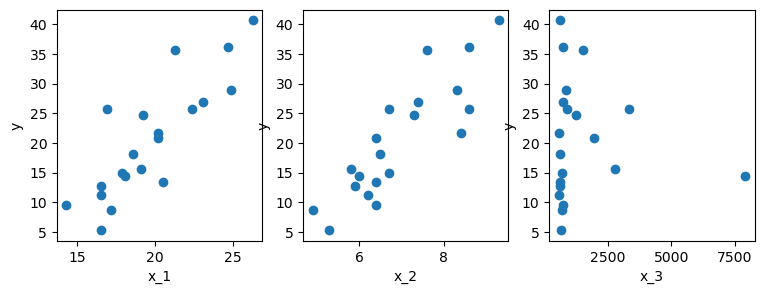

In [143]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

dataset={
  'x_1':[16.5,20.5,26.3,16.5,19.2,16.5,20.2,21.3,17.2,14.3,
          18.1,23.1,19.1,24.7,18.6,24.9,17.9,22.4,20.2,16.9],
  'x_2':[6.2,6.4,9.3,5.3,7.3,5.9,6.4,7.6,4.9,6.4,
          6.0,7.4,5.8,8.6,6.5,8.3,6.7,8.6,8.4,6.7],
  'x_3':[587,643,635,692,1248,643,1964,1531,713,749,
          7895,762,2793,741,625,854,716,921,595,3353],
  'y':[11.2,13.4,40.7,5.3,24.8,12.7,20.9,35.7,8.7,9.6,
        14.5,26.9,15.7,36.2,18.1,28.9,14.9,25.8,21.7,25.7]
}

# 画出三张散点图
plt.figure(figsize=(9,3))
plt.subplot(131)
plt.scatter(dataset['x_1'],dataset['y'])
plt.xlabel('x_1')
plt.ylabel('y')
plt.subplot(132)
plt.scatter(dataset['x_2'],dataset['y'])
plt.xlabel('x_2')
plt.ylabel('y')
plt.subplot(133)
plt.scatter(dataset['x_3'],dataset['y'])
plt.xlabel('x_3')
plt.ylabel('y')
plt.show()



In [144]:

x_1_times_x_2 = np.array(dataset['x_1']) * np.array(dataset['x_2'])
x_1_times_x_3 = np.array(dataset['x_1']) * np.array(dataset['x_3'])
x_2_times_x_3 = np.array(dataset['x_2']) * np.array(dataset['x_3'])
x_1_squared = np.array(dataset['x_1']) * np.array(dataset['x_1'])
x_2_squared = np.array(dataset['x_2']) * np.array(dataset['x_2'])


X=np.array([dataset['x_1'],x_1_times_x_3,x_2_times_x_3]).T
y=np.array(dataset['y'])

X=np.delete(X,7,axis=0)
y=np.delete(y,7,axis=0)

def linear_regression(X,y):
  print("----------------------------------------start----------------------------------------")

  # 线性回归模型
  model = LinearRegression()
  model.fit(X, y)

  # 回归系数
  beta_0 = model.intercept_
  beta_1 = model.coef_

  print(f'回归系数 β0: {beta_0}, β1: {beta_1}')

  # 添加常数项（截距）
  X_const = sm.add_constant(X)

  # 使用stalicense
  ols_model = sm.OLS(y, X_const).fit()
  print(ols_model.summary())

  # 置信区间
  conf = ols_model.conf_int(alpha=0.05)
  print(f'置信区间: \n{conf}')


  # 提取残差
  residuals = ols_model.resid

  print("residuals:",residuals)

  # 计算残差的平方和
  RSS = np.sum(residuals**2)

  # 自由度
  dof = ols_model.df_resid

  # 计算剩余方差
  residual_variance = RSS / dof

  print(f'残差的平方和 (RSS): {RSS}')
  print(f'自由度 (dof): {dof}')
  print(f'剩余方差: {residual_variance}')

  print("----------------------------------------end----------------------------------------")
  return ols_model

linear_regression(X,y)


----------------------------------------start----------------------------------------
回归系数 β0: -35.054661519981465, β1: [ 2.69530852e+00 -1.19663158e-03  3.66758158e-03]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     47.64
Date:                Sun, 02 Jun 2024   Prob (F-statistic):           6.67e-08
Time:                        17:01:56   Log-Likelihood:                -46.798
No. Observations:                  19   AIC:                             101.6
Df Residuals:                      15   BIC:                             105.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err        

/home/yux/codes/math-exam/mathematical_exp/.conda/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  res = hypotest_fun_out(*samples, **kwds)


### 结果分析

#### 第一问
1. 第一问中,首先画出三个自变量与因变量之间的散点图,观察到x_1和x_2与y之间都有较强线性关系,x_3的图像比较无规律,没有合适的关系.
2. 接着我分别尝试了下列模型,记录其结果如下
   - $ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 + \epsilon ,\quad F=24.02,s^2=21.07$,
  ```bash
  ==============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
  ------------------------------------------------------------------------------
  const        -36.7649      7.011     -5.244      0.000     -51.627     -21.902
  x1             1.1922      0.562      2.123      0.050       0.002       2.383
  x2             4.7198      1.530      3.084      0.007       1.475       7.964
  x3             0.0008      0.001      1.199      0.248      -0.001       0.002
  ```
  这里x3的系数置信区间包括0说明确实没有新显著的线性关系
1. 取自变量可选集合为$[x_1,x_2,x_1*x_2,x_1*x_3,x_2*x_3]$由于第一月问再最多只允许选取两个变量,所以只需要分别尝试[x_1,x_2],[x_1,x_3],[x_2,x_3]的对应的子集,然后比较子集中最小的$s^2$即可.
2. 最终选择$[x_1,x_2]$得到了最小的$s^2=21.60838792806308$且此时各系数的p值均小于$\alpha$,可以选择
#### 第二问
经过尝试,发现了最优模型
$$
y = -36.6098 + 2.7886 x_1 + -0.0013 x_1x_3 + 0.0039 x_2x_3 + \epsilon ,\quad s^2=15.0,F=35.91
$$
这个模型的$s^2,F,R^2$等参数优于第一问模型以及其他所有模型,并且各个参数也都是显著的.

#### 第三问

观察残差,第8个数据点的残差显著较高,考虑去除这个点.结果$R^2=0.905,F=47.64,s^2=10.22266617799408$


### 结论
1.最好的模型是
  $$
  y = -34.0725334304927 + 1.2239 x_1 + 4.3989 x_2+\epsilon
  $$
2.包含3个自变量的模型有更月好的,最终模型
  $$
  y = -36.6098 + 2.7886 x_1 + -0.0013 x_1x_3 + 0.0039 x_2x_3 + \epsilon
  $$
3.去掉异常点后,各参数显著优,模型更加有效,最终模型
  $$
  y = -35.0547 + 2.6953 x_1 + -0.0012 x_1x_3 + 0.0037 x_2x_3 + \epsilon
  $$

### 意义
通过上述模型，可以全面了解低收入家庭比例、失业率和人口规模对犯罪率的影响，从而为制定减少犯罪率的社会政策提供科学依据。

## 第8题：
### 问题分析与模型建立
### 问题分析

汽车销售商认为汽车销售量与汽油价格和贷款利率有显著关联。为了验证这一假设，并进一步了解不同类型汽车（普通型和豪华型）的销售量如何受这些因素影响，进行了为期18个月的数据收集和分析。

#### 数据收集

在为期18个月的时间内，研究人员记录了以下数据：
1. **普通型汽车销售量**（a）：以千辆为单位，记录普通型汽车的月销售量。
2. **豪华型汽车销售量**（s）：以千辆为单位，记录豪华型汽车的月销售量。
3. **汽油价格**（p）：以元/加仑为单位，记录每个月的平均汽油价格。
4. **贷款利率**（q）：以百分比为单位，记录每个月的平均贷款利率。
5. **汽车类型**（z）：使用二值变量z表示汽车类型，0表示普通型汽车，1表示豪华型汽车。

#### 研究目的

本研究旨在回答以下几个问题：
1. **汽油价格对汽车销售量的影响**：汽油价格的波动是否显著影响普通型和豪华型汽车的销售量？
2. **贷款利率对汽车销售量的影响**：贷款利率的变化是否显著影响普通型和豪华型汽车的销售量？
3. **汽车类型的差异**：普通型和豪华型汽车的销售量是否对汽油价格和贷款利率的敏感度不同？
4. **交互作用**：汽油价格、贷款利率与汽车类型之间是否存在交互作用，对不同类型汽车的销售量产生综合影响？

#### 数据分析方法

为了回答上述问题，研究人员将采用多元回归分析方法，建立一个统一的回归模型，分析各自变量与因变量之间的关系。具体步骤如下：

1. **数据预处理**：对数据进行整理和标准化处理，确保数据的准确性和一致性。
2. **特征选择**：选择适当的自变量（汽油价格、贷款利率、汽车类型及其交互项）和因变量（汽车销售量）。
3. **模型建立**：采用多元回归模型，分析各自变量与因变量之间的关系。由于汽车类型为分类变量，模型中将包含交互项。
4. **模型评估**：通过残差分析、显著性检验等方法评估模型的拟合效果和预测能力。
5. **结果解释**：根据模型结果，解释汽油价格、贷款利率和汽车类型对汽车销售量的影响，提出相应的市场策略和建议。

#### 模型构建

为了系统性分析上述关系，将建立如下形式的回归模型：

$$ \text{Sales} = \beta_0 + \beta_1 \cdot p + \beta_2 \cdot q + \beta_3 \cdot z + \beta_4 \cdot (p \times z) + \beta_5 \cdot (q \times z) + \epsilon $$

其中：
- $\text{Sales}$ 是汽车销售量（包括普通型和豪华型）。
- $p$ 是汽油价格。
- $q$ 是贷款利率。
- $z$ 是汽车类型（0表示普通型，1表示豪华型）。
- $(p \times z)$ 和 $(q \times z)$ 是交互项，用于捕捉汽油价格和贷款利率与汽车类型之间的交互作用。
- $\beta_0, \beta_1, \beta_2, \beta_3, \beta_4, \beta_5$ 是模型参数，需要通过数据拟合进行估计。
- $\epsilon$ 是误差项。

### 代码实现与结果


In [145]:
dataset={
  'x_1':[1.89,1.94,1.95,1.82,1.85,1.78,1.76,1.76,1.75,1.74,1.70,1.70,1.68,1.60,1.61,1.64,1.67,1.68],
  'x_2':[6.1,6.2,6.3,8.2,9.8,10.3,10.5,8.7,7.4,6.9,5.2,4.9,4.3,3.7,3.6,3.1,1.8,2.3],
  'y_1':[22.1,15.4,11.7,10.3 ,11.4 ,7.5, 13.0, 12.8, 14.6, 18.9, 19.3, 30.1, 28.2, 25.6, 37.5, 36.1, 39.8, 44.3],
  'y_2':[7.2 ,5.4 ,7.6, 2.5, 2.4, 1.7, 4.3, 3.7, 3.9, 7.0, 6.8, 10.1, 9.4, 7.9, 14.1, 14.5, 14.9, 15.6],
}

X=np.array([dataset['x_1'],dataset['x_2']]).T
y_1=np.array(dataset['y_1'])
y_2=np.array(dataset['y_2'])

linear_regression(X,y_1)
linear_regression(X,y_2)


----------------------------------------start----------------------------------------
回归系数 β0: 90.18136585730868, β1: [-27.65882871  -3.22834679]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     45.80
Date:                Sun, 02 Jun 2024   Prob (F-statistic):           4.10e-07
Time:                        17:01:56   Log-Likelihood:                -51.211
No. Observations:                  18   AIC:                             108.4
Df Residuals:                      15   BIC:                             111.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.0

/home/yux/codes/math-exam/mathematical_exp/.conda/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)
/home/yux/codes/math-exam/mathematical_exp/.conda/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)


----------------------------------------start----------------------------------------
回归系数 β0: 64.57532397661734, β1: [-16.14364096  -2.3321891  -14.42222222]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     54.61
Date:                Sun, 02 Jun 2024   Prob (F-statistic):           1.10e-12
Time:                        17:01:56   Log-Likelihood:                -105.14
No. Observations:                  36   AIC:                             218.3
Df Residuals:                      32   BIC:                             224.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>

Text(0, 0.5, 'residuals_2')

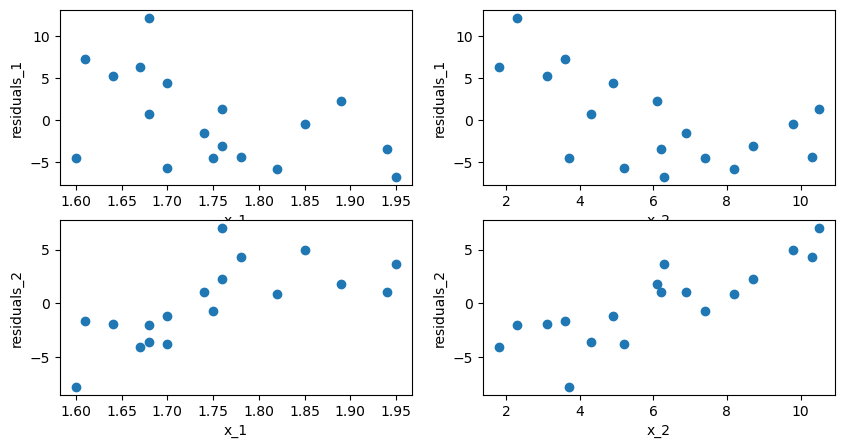

In [146]:
#question2

X_with_zeros=np.array([dataset['x_1'],dataset['x_2'],np.zeros(len(dataset['x_1']))]).T
X_with_ones=np.array([dataset['x_1'],dataset['x_2'],np.ones(len(dataset['x_1']))]).T
X=np.vstack((X_with_zeros,X_with_ones))
y=np.hstack((y_1,y_2))

fin_model=linear_regression(X,y)

residuals = fin_model.resid
residuals_1=residuals[:len(y_1)]
residuals_2=residuals[len(y_1):]

plt.figure(figsize=(10,5))
plt.subplot(221)
plt.scatter(dataset['x_1'],residuals_1)
plt.xlabel('x_1')
plt.ylabel('residuals_1')
plt.subplot(222)
plt.scatter(dataset['x_2'],residuals_1)
plt.xlabel('x_2')
plt.ylabel('residuals_1')
plt.subplot(223)
plt.scatter(dataset['x_1'],residuals_2)
plt.xlabel('x_1')
plt.ylabel('residuals_2')
plt.subplot(224)
plt.scatter(dataset['x_2'],residuals_2)
plt.xlabel('x_2')
plt.ylabel('residuals_2')



----------------------------------------start----------------------------------------
回归系数 β0: 55.41285745609244, β1: [ -7.71189408 -28.29747957   2.28503781   0.31000011]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     100.4
Date:                Sun, 02 Jun 2024   Prob (F-statistic):           2.77e-17
Time:                        17:01:56   Log-Likelihood:                -90.294
No. Observations:                  36   AIC:                             190.6
Df Residuals:                      31   BIC:                             198.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err      

Text(0, 0.5, 'residuals_2')

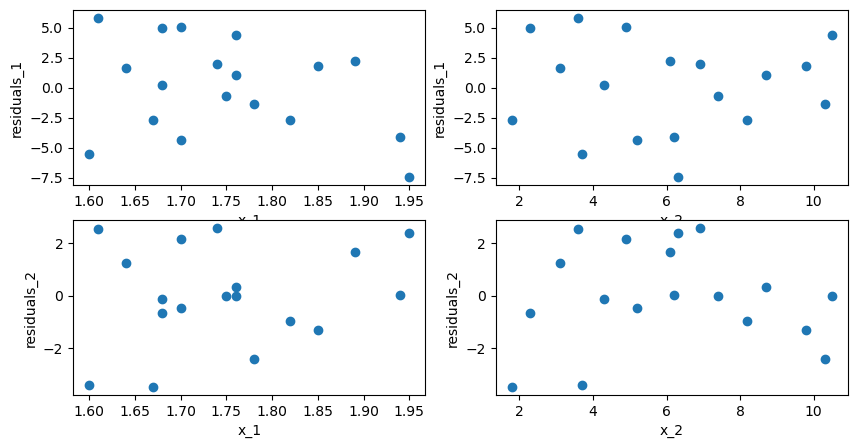

In [147]:
#第4问

x_1=np.hstack((dataset['x_1'],dataset['x_1']))
x_2=np.hstack((dataset['x_2'],dataset['x_2']))
x_3=np.hstack((np.zeros(len(dataset['x_1'])),np.ones(len(dataset['x_1']))))
y=np.hstack((y_1,y_2))
x_1x_2 = x_1 * x_2
x_1x_3 = x_1 * x_3
x_2x_3 = x_2 * x_3
x_1_squared = x_1 * x_1
x_2_squared = x_2 * x_2
x_3_squared = x_3 * x_3

X=np.array([x_2,x_3,x_2x_3,x_2_squared]).T
fin_model=linear_regression(X,y)

residuals = fin_model.resid
residuals_1=residuals[:len(y_1)]
residuals_2=residuals[len(y_1):]

plt.figure(figsize=(10,5))
plt.subplot(221)
plt.scatter(dataset['x_1'],residuals_1)
plt.xlabel('x_1')
plt.ylabel('residuals_1')
plt.subplot(222)
plt.scatter(dataset['x_2'],residuals_1)
plt.xlabel('x_2')
plt.ylabel('residuals_1')
plt.subplot(223)
plt.scatter(dataset['x_1'],residuals_2)
plt.xlabel('x_1')
plt.ylabel('residuals_2')
plt.subplot(224)
plt.scatter(dataset['x_2'],residuals_2)
plt.xlabel('x_2')
plt.ylabel('residuals_2')

### 结果分析与结论
#### 第一问
1. 模型1
  
  ```bash
  ==============================================================================
                 估计值    std err          t      P>|t|      [0.025 置信区间 0.975]
  ------------------------------------------------------------------------------
  beta_0         90.1814     20.636      4.370      0.001      46.197     134.166
  beta_1        -27.6588     12.618     -2.192      0.045     -54.554      -0.763
  beta_2        -3.2283      0.491     -6.576      0.000      -4.275      -2.182
  ```
  $R^2=0.859,F=45.80,s^2=20.79$
1. 模型2

  ```bash
  ==============================================================================
                 估计值    std err          t      P>|t|      [0.025 置信区间 0.975]
  ------------------------------------------------------------------------------
  beta_0         24.5471      8.739      2.809      0.013       5.920      43.174
  beta_1        -4.6285      5.344     -0.866      0.400     -16.018       6.762
  beta_2        -1.4360      0.208     -6.907      0.000      -1.879      -0.993
  ```
  $R^2=0.840,F=39.45,s^2=3.73$
#### 第二问

0表示普通,1表示豪华

  ```bash
  ==============================================================================
                 估计值    std err          t      P>|t|      [0.025 置信区间 0.975]
  ------------------------------------------------------------------------------
  beta_0        64.5753     15.256      4.233      0.000      33.501      95.650
  beta_1       -16.1436      9.316     -1.733      0.093     -35.119       2.832
  beta_2        -2.3322      0.362     -6.435      0.000      -3.070      -1.594
  beta_3       -14.4222      1.587     -9.088      0.000     -17.655     -11.190
  ```
  $R^2=0.837,F=54.61,s^2=22.66418048309718$

  将$beta_3=0,1$代入后,观察可以发现$beta_0,beta_1,beta_2$的估计值均在(1)问两个模型之间.这可能是由于统一模型需要同时兼顾普通车和豪华车两个模型,所以参数其估计值较为平均.

#### 第三问
根据散点图可以看出残差和自变量之间有比较明显的线性关系,不满足残差分布的独立性与正态性.

#### 第四问

经过`stepwise`方法选择合适自变量后得到最佳模型
$$
y=55.4129-7.7119x_2 -14.1487x_3 +2.2850x_2x_3+0.3100x_2^2
$$
各个参数都较第2问模型更优,说明模型更加有效,并且此时残差散点图满足独立性与正态性.

### 意义

通过上述模型，可以全面了解汽油价格、贷款利率和汽车类型对汽车销售量的影响，从而为汽车销售策略提供科学依据。


## 第11题：

### 问题分析与模型建立

### 实验问题分析

为了评估一种新止痛剂的疗效，医药公司新药研究部门设计并实施了一项药物实验。本实验的主要目的是了解新药的疗效与病人的用药剂量、性别和血压之间的关系。实验的具体设计和结果如下：

#### 实验设计

1. **受试者**：实验共招募了24名患有相同病痛的病人，这些病人被随机分配到不同的实验组。
2. **用药剂量**：受试者被分别给予4个不同剂量的止痛剂，剂量分别为2克、5克、7克和10克。
3. **性别**：受试者按性别进行分组，其中性别以0表示女性，1表示男性。
4. **血压分组**：为了探讨血压对药物疗效的影响，受试者根据历史血压数据从低到高分成三组，分别用0.25、0.50和0.75表示低、中、高血压档。

#### 数据收集

在实验过程中，研究人员记录了每个病人服用新止痛剂后病痛明显减轻的时间（以分钟为单位）。实验结束后，研究人员收集并整理了所有受试者的以下数据：

- 用药剂量（x_1）
- 性别（x_2）
- 血压组别（x_3）
- 病痛明显减轻的时间（y）

#### 研究目的

通过对收集到的数据进行分析，研究人员希望回答以下几个问题：

1. **剂量对疗效的影响**：不同剂量的新止痛剂是否对病痛减轻时间有显著影响？是否存在最佳剂量？
2. **性别对疗效的影响**：男性和女性在使用新止痛剂后的病痛减轻时间是否存在差异？
3. **血压对疗效的影响**：不同血压组别的病人在使用新止痛剂后的病痛减轻时间是否存在差异？
4. **交互作用**：用药剂量、性别和血压之间是否存在交互作用，对病痛减轻时间产生综合影响？

#### 分析方法

为了回答上述问题，研究人员将采用多元回归分析方法，建立一个非线性回归模型，具体步骤如下：

1. **数据预处理**：对数据进行整理和标准化处理，确保数据的准确性和一致性。
2. **特征选择**：选择适当的自变量（用药剂量、性别、血压组别）和因变量（病痛减轻时间）。
3. **模型建立**：采用多项式回归或其他非线性回归模型，分析自变量与因变量之间的关系。
4. **模型评估**：通过残差分析、显著性检验等方法评估模型的拟合效果和预测能力。
5. **结果解释**：根据模型结果，解释用药剂量、性别和血压对新止痛剂疗效的影响，提出相应的医学建议和结论。

### 代码实现与结果

截距: 47.70751633986943
系数: [ -7.00588235   2.33333333  16.67647059   0.51111111   1.
  -7.52941176   2.33333333 -10.          32.        ]


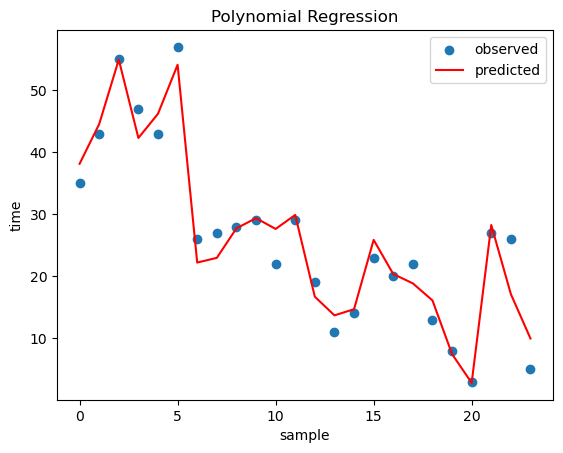

In [148]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# 数据集
data = {
  'x_1': [2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 5, 7, 7, 7, 7, 7, 7, 10, 10, 10, 10, 10, 10],
  'x_2': [0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1],
  'x_3': [0.25, 0.50, 0.75, 0.25, 0.50, 0.75, 0.25, 0.50, 0.75, 0.25, 0.50, 0.75, 0.25, 0.50, 0.75, 0.25, 0.50, 0.75, 0.25, 0.50, 0.75, 0.25, 0.50, 0.75],
  'y': [35, 43, 55, 47, 43, 57, 26, 27, 28, 29, 22, 29, 19, 11, 14, 23, 20, 22, 13, 8, 3, 27, 26, 5]
}

df = pd.DataFrame(data)

# 特征和目标变量
X = df[['x_1', 'x_2', 'x_3']]
y = df['y']

# 定义多项式回归模型
degree = 2  # 多项式的阶数
polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
linear_regression_ = LinearRegression()
pipeline = Pipeline([
    ("polynomial_features", polynomial_features),
    ("linear_regression", linear_regression_)
])

# 拟合模型
pipeline.fit(X, y)

# 获取模型的系数
model = pipeline.named_steps["linear_regression"]
intercept = model.intercept_
coefficients = model.coef_

print(f'截距: {intercept}')
print(f'系数: {coefficients}')

# 预测
y_pred = pipeline.predict(X)

# 绘制预测结果与实际值的比较
plt.scatter(range(len(y)), y, label='observed')
plt.plot(range(len(y)), y_pred, label='predicted', color='red')
plt.xlabel('sample')
plt.ylabel('time')
plt.legend()
plt.title('Polynomial Regression')
plt.show()


In [149]:
dataset={
  'x_1':np.array([2,2,2,2,2,2,5,5,5,5,5,5,7,7,7,7,7,7,10,10,10,10,10,10]),
  'x_2':np.array([0,0,0,1,1,1,0,0,0,1,1,1,0,0,0,1,1,1,0,0,0,1,1,1]),
  'x_3':np.array([0.25,0.50,0.75,0.25,0.50,0.75,0.25,0.50,0.75,0.25,0.50,0.75,0.25,0.50,0.75,0.25,0.50,0.75,0.25,0.50,0.75,0.25,0.50,0.75,]),
  'y':np.array([35,43,55, 47, 43, 57, 26, 27, 28, 29, 22, 29, 19, 11, 14, 23, 20, 22, 13 ,8 ,3 ,27, 26, 5])
}
x_1_squared=dataset['x_1']*dataset['x_1']
x_2_squared=dataset['x_2']*dataset['x_2']
x_3_squared=dataset['x_3']*dataset['x_3']
x_1x_2=dataset['x_1']*dataset['x_2']
x_1x_3=dataset['x_1']*dataset['x_3']
x_2x_3=dataset['x_2']*dataset['x_3']

X=np.array([dataset['x_1'],x_1_squared,x_1x_3,x_2x_3]).T
y=np.array(dataset['y'])

linear_regression(X,y)


----------------------------------------start----------------------------------------
回归系数 β0: 62.61593392565361, β1: [-9.10027574  0.51111111 -2.340625   10.3859375 ]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     27.31
Date:                Sun, 02 Jun 2024   Prob (F-statistic):           1.20e-07
Time:                        17:01:57   Log-Likelihood:                -74.921
No. Observations:                  24   AIC:                             159.8
Df Residuals:                      19   BIC:                             165.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          

### 结果分析

采用2次多元线性模型,画出图像发现拟合比较成功.于是考虑就再使用2次多元线性,对的参数进一步分析优化,得到最终模型:
$$
y=62.6159-9.1003x_1+0.5111x_1^2-2.3406x_1x_3+10.3859x_2x_3
$$
这个模型的几个参数都比较显著,并且R^2也可以接受

### 结论
最终模型为
$$
y=62.6159-9.1003x_1+0.5111x_1^2-2.3406x_1x_3+10.3859x_2x_3 (min)
$$
其中$x_1$表示用药剂量(g),$x_2$表示性别,$x_3$表示血压组别

通过上述分析，研究人员将能够全面了解新止痛剂的疗效，并为药物的进一步开发和临床应用提供科学依据。